In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import csv

In [2]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


1) 히스토그램을 활용한 최고기온, 최저 기온, 평균기온 분포 확인하기

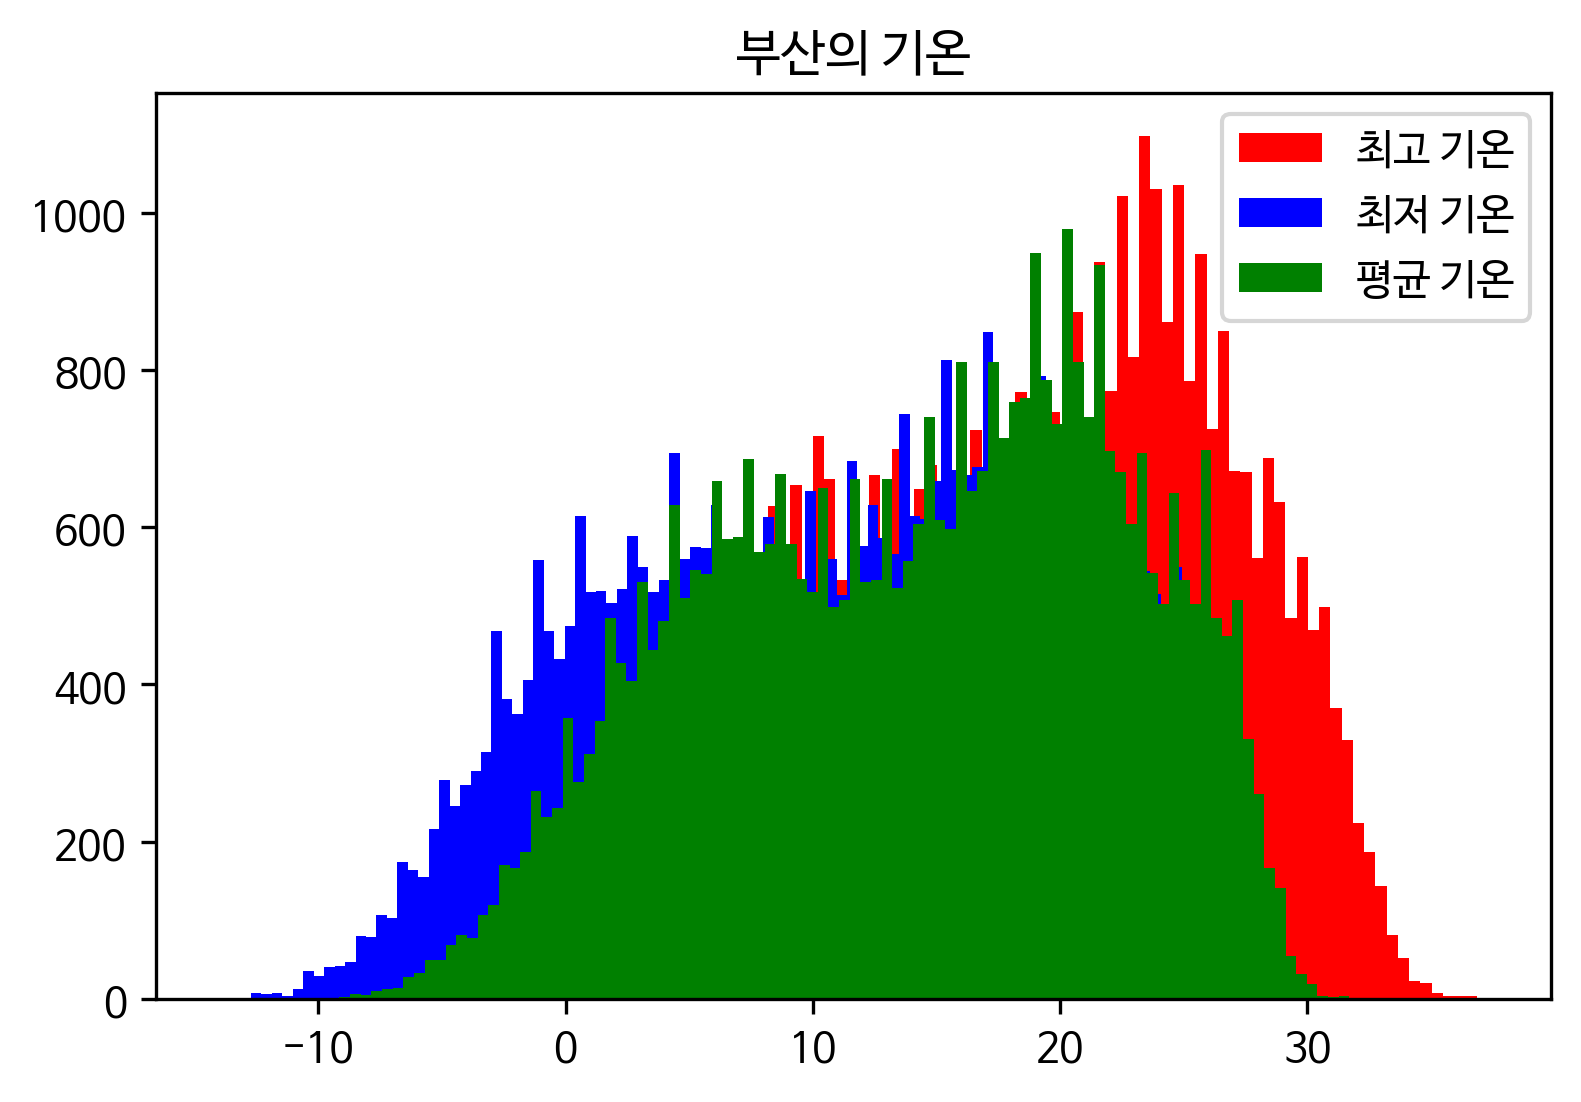

In [3]:
# 최고, 최저, 평균 기온 ...히스토그램
f = open('/content/busan_temp.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)

high = []
avg = []
low = []

for row in data:
  if row[-1] != '':   # 최고 기온 데이터 값이 존재하면 (결측치 제외)
    high.append(float(row[-1]))
    low.append(float(row[-2]))
    avg.append(float(row[-3]))

plt.figure(dpi = 150)
plt.title('부산의 기온')
plt.hist(high, bins= 100, color = 'r', label = '최고 기온')
plt.hist(low, bins= 100, color = 'b', label = '최저 기온')
plt.hist(avg, bins= 100, color = 'g', label = '평균 기온')
plt.legend()
plt.show()

2) 상자그림을 활용한 최고 기온 vs 서울 최고 기온


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


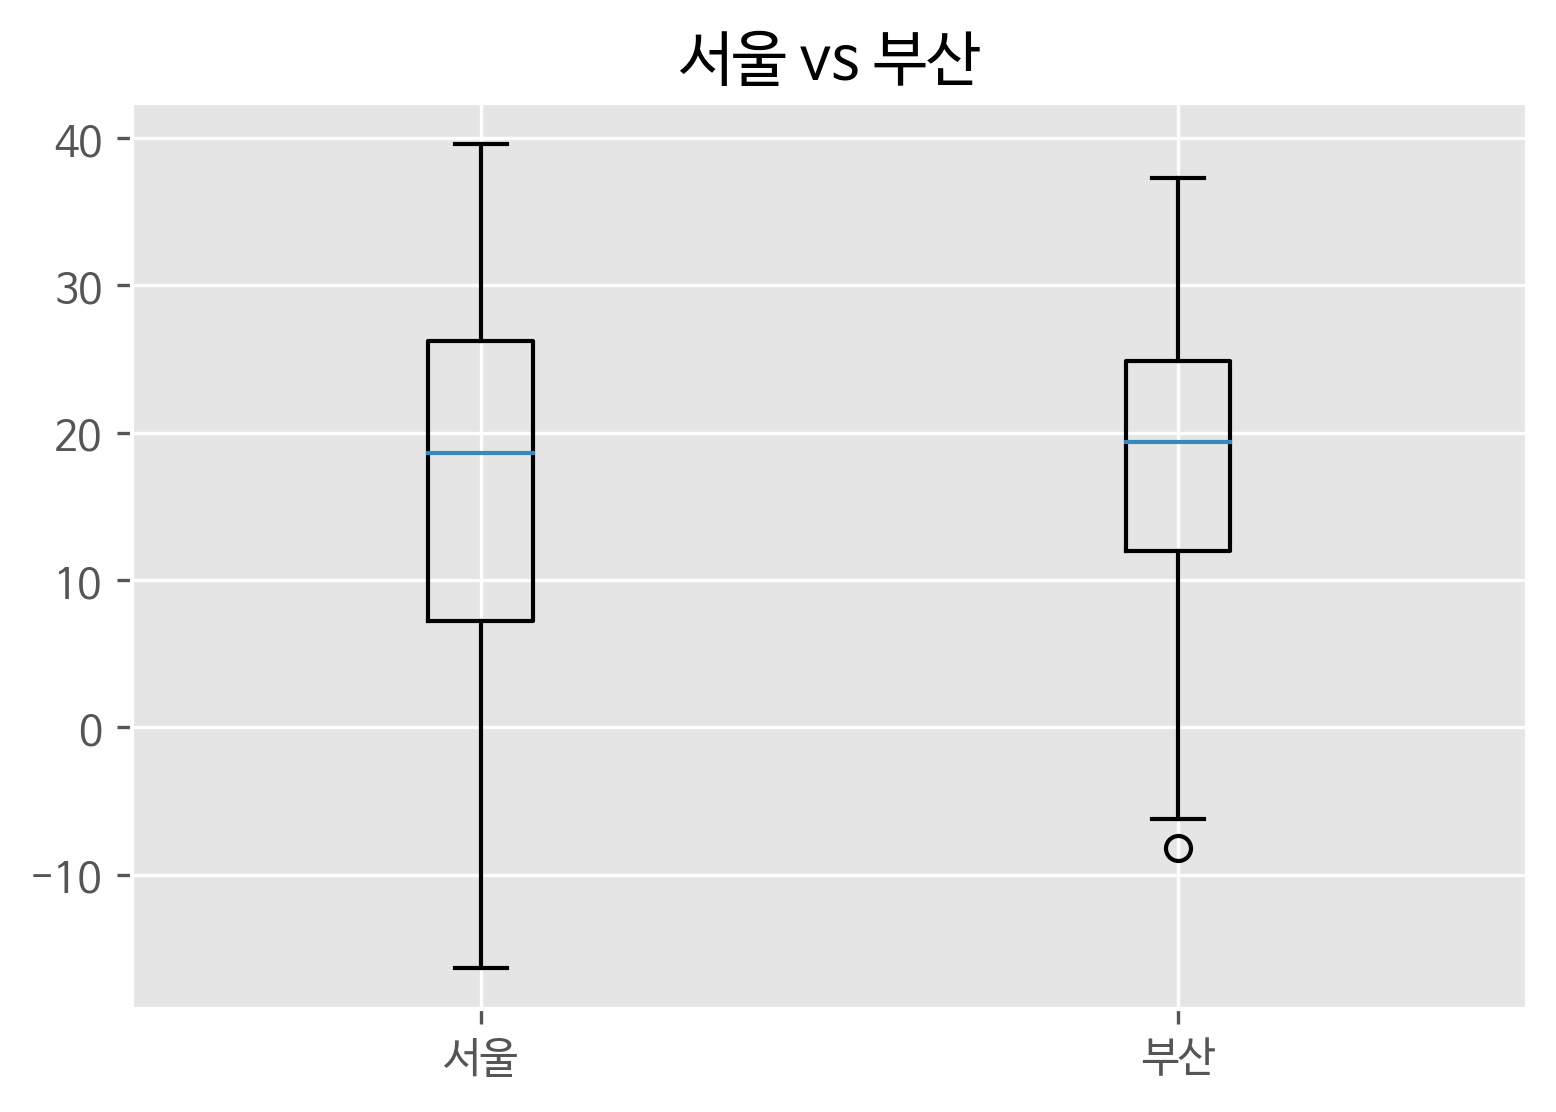

In [6]:
f = open('/content/busan_temp.csv', encoding = 'cp949')
busan_data = csv.reader(f)
next(busan_data)

ff = open('/content/seoul.csv', encoding = 'cp949')
seoul_data = csv.reader(ff)
next(seoul_data)


seoul_high = []
busan_high = []

for row in busan_data:
  if row[-1] != '':   # 최고 기온 데이터 값이 존재하면 (결측치 제외)
    busan_high.append(float(row[-1]))

for row in seoul_data:
  if row[-1] != '':
    seoul_high.append(float(row[-1]))


plt.figure(dpi = 150)
plt.style.use('ggplot')
plt.title('서울 vs 부산')
plt.boxplot([seoul_high, busan_high], labels = ['서울', '부산'])
plt.show()

3) 월별 최고기온 상자 그림 그리기

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


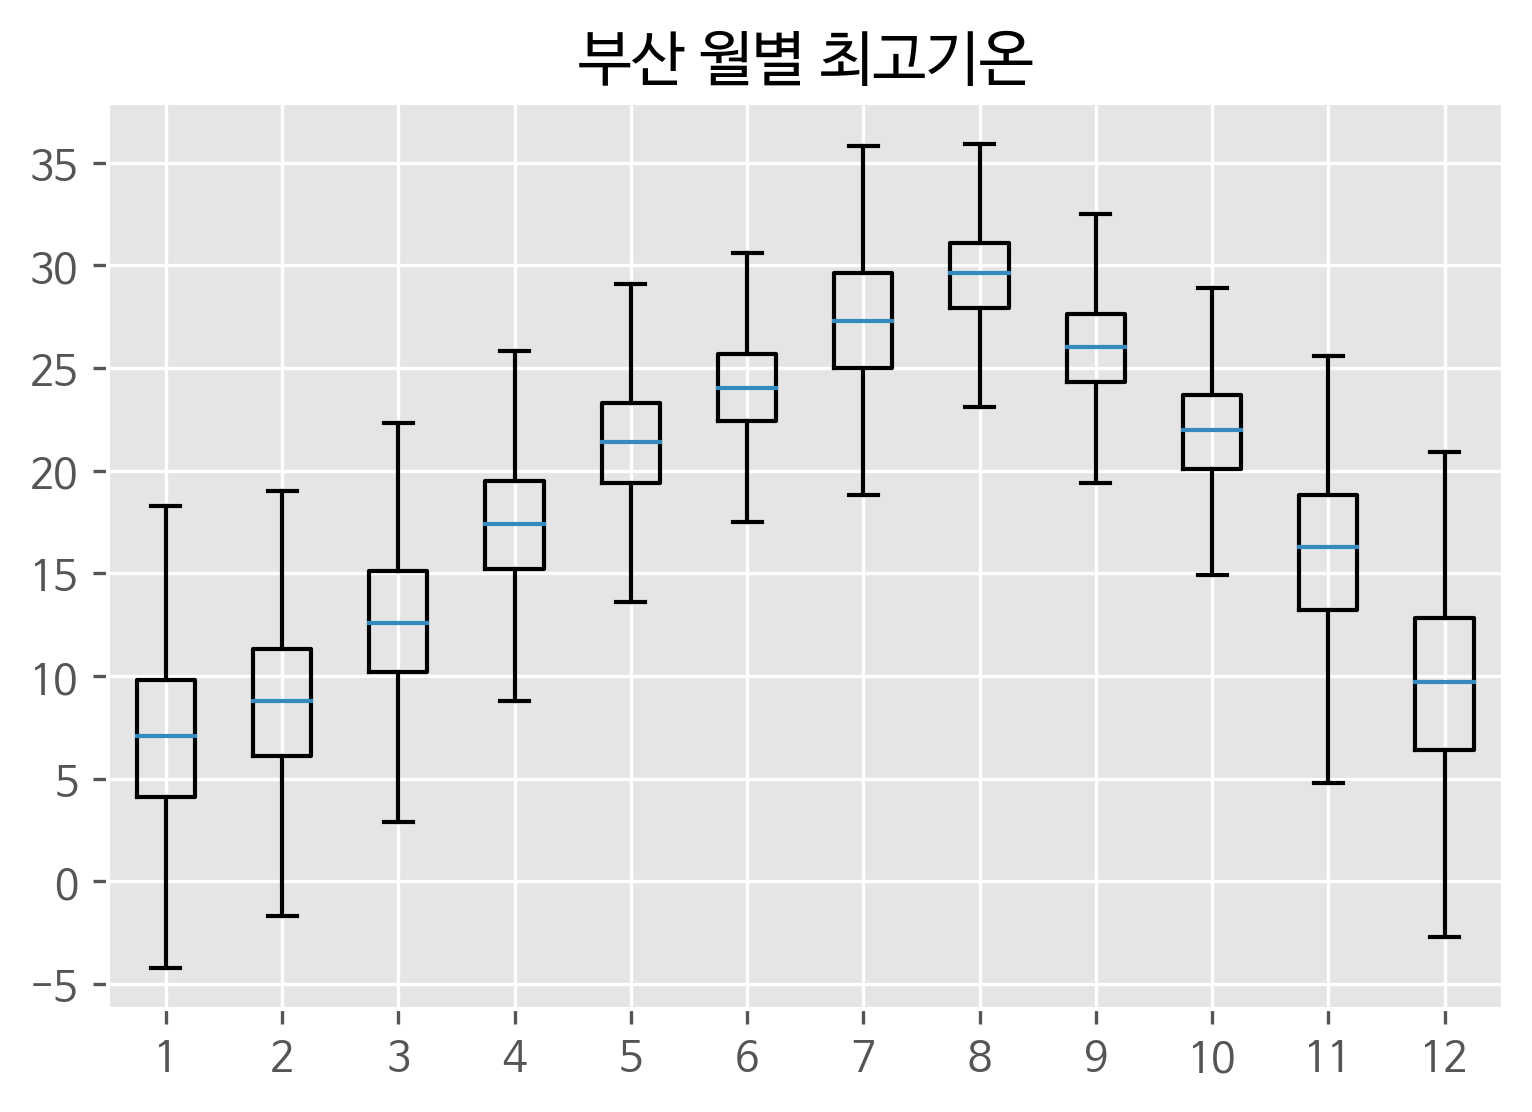

In [7]:
f = open('/content/busan_temp.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)

month = []    # 월별 데이터를 저장할 리스트 month 변수 선언
for i in range(12):
  month.append([])    # month 리스트 내에 12개 리스트 생성 [[], [], [], ..., []]

for row in data:
  if row[-1] != '':
    month[int(row[0].split('-')[1])-1].append(float(row[-1]))

plt.figure(dpi = 150)
plt.style.use('ggplot')
plt.title('부산 월별 최고기온')
plt.boxplot(month, showfliers = False)    # 아웃라이어(이상치) 값 생략
plt.show()

4) 특정 달의 일별 최고 기온 상자 그림 그리기


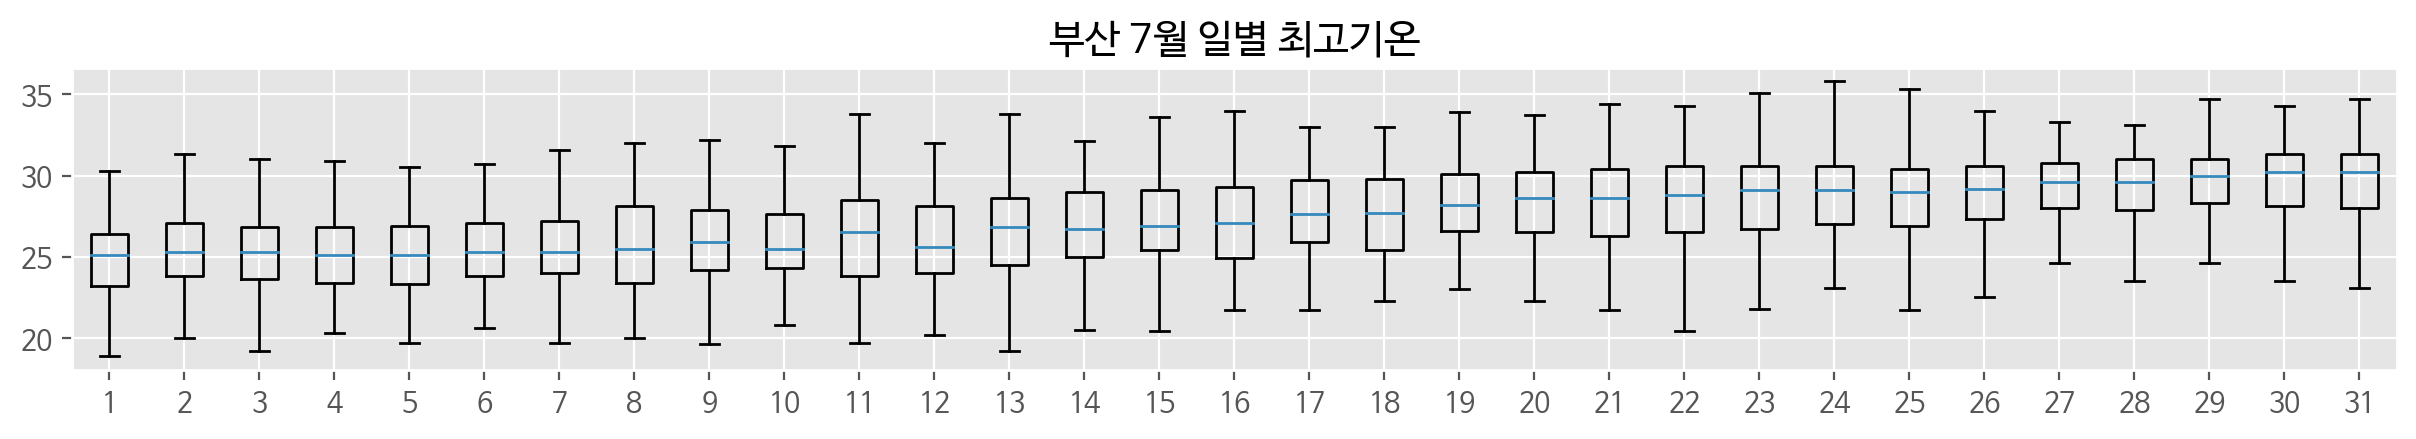

In [23]:
f = open('/content/busan_temp.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)

day = []    # 일별 데이터를 저장할 리스트 day 변수 선언
for i in range(31):
  day.append([])    # day 리스트 내에 31개 리스트 생성 [[], [], [], ..., []]

for row in data:
  if row[-1] != '':
    if row[0].split('-')[1] == '07':
      day[int(row[0].split('-')[2])-1].append(float(row[-1]))   # 8월 최고 기온 값 저장 day[0] -> 1일

plt.style.use('ggplot') # 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(figsize = (15, 2), dpi = 100)
plt.title('부산 7월 일별 최고기온')
plt.boxplot(day, showfliers  = False)    # 아웃라이어(이상치) 값 생략
plt.show()

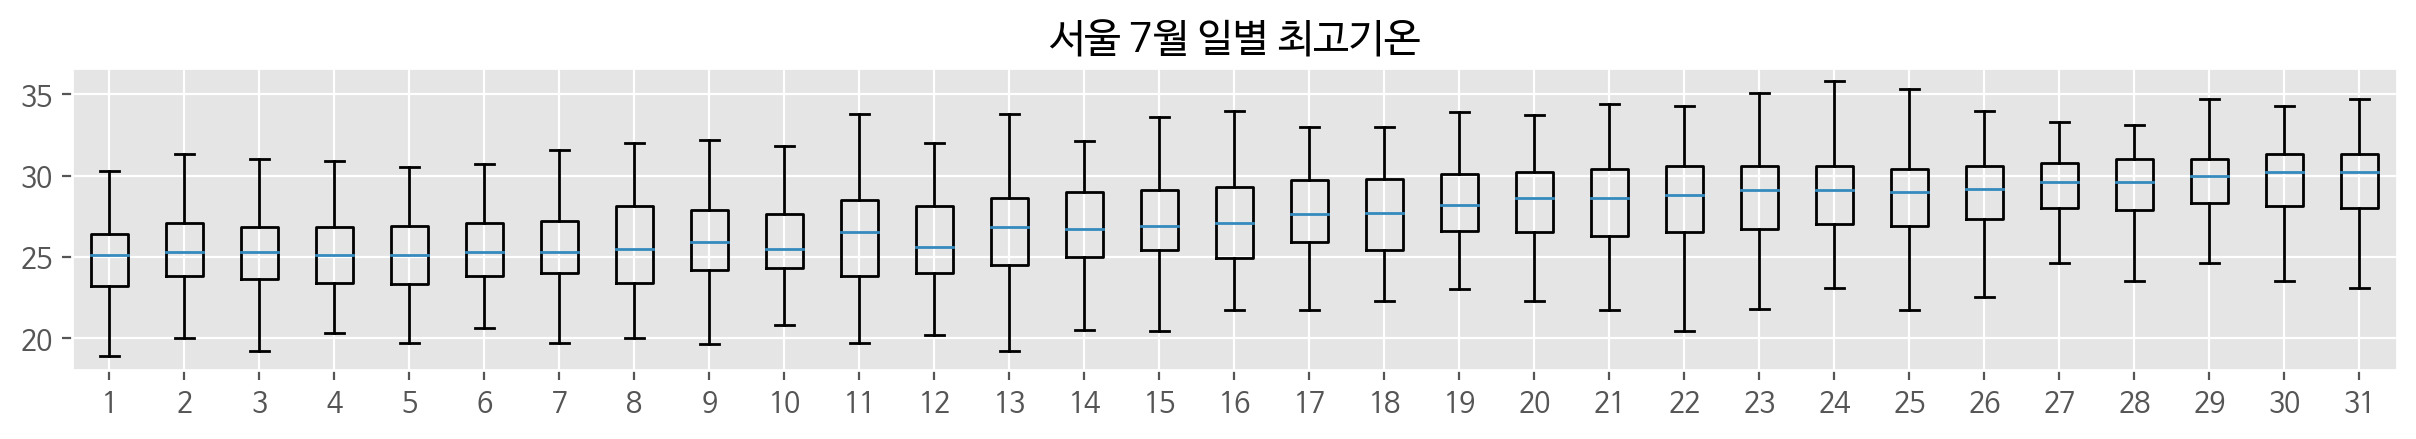

In [22]:
ff = open('/content/seoul.csv', encoding = 'cp949')
seoul_data = csv.reader(ff)
next(seoul_data)

day1 = []
for i in range(31):
  day1.append([])

for row in seoul_data:
  if row[-1] != '':
    if row[0].split('-')[1] == '07':
      day1[int(row[0].split('-')[2])-1].append(float(row[-1]))
    
plt.style.use('ggplot') # 그래프 스타일 지정 (회색 배경의 격자무늬, 2/4 값을 의미하는 선의 색 변경)
plt.figure(figsize = (15, 2), dpi = 100)
plt.title('서울 7월 일별 최고기온')
plt.boxplot(day, showfliers  = False)    # 아웃라이어(이상치) 값 생략
plt.show()